<a href="https://colab.research.google.com/github/vahidseydi/CGN/blob/main/FewShot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading dataset file from Github 

In [217]:
! wget 'https://github.com/vahidseydi/CGN/blob/main/Data/amazon_electronics_computers%20(1).npz?raw=true'

--2021-05-15 09:49:24--  https://github.com/vahidseydi/CGN/blob/main/Data/amazon_electronics_computers%20(1).npz?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/vahidseydi/CGN/raw/main/Data/amazon_electronics_computers%20(1).npz [following]
--2021-05-15 09:49:24--  https://github.com/vahidseydi/CGN/raw/main/Data/amazon_electronics_computers%20(1).npz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vahidseydi/CGN/main/Data/amazon_electronics_computers%20(1).npz [following]
--2021-05-15 09:49:24--  https://raw.githubusercontent.com/vahidseydi/CGN/main/Data/amazon_electronics_computers%20(1).npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubu

In [218]:
import numpy as np
npz_data=np.load('/content/amazon_electronics_computers (1).npz?raw=true')
npz_data.files

['adj_data',
 'adj_indices',
 'adj_indptr',
 'adj_shape',
 'attr_data',
 'attr_indices',
 'attr_indptr',
 'attr_shape',
 'labels',
 'class_names']

In [219]:
class_names =npz_data['class_names']
class_names

array(['Desktops', 'Data Storage', 'Laptops', 'Monitors',
       'Computer Components', 'Video Projectors', 'Routers', 'Tablets',
       'Networking Products', 'Webcams'], dtype='<U19')

In [220]:
labels =npz_data['labels']
y=labels.size
#p for calculating percentage for idx_train,val,test
p = lambda x: x*y/100

In [221]:
import numpy as np
import scipy.sparse as sp
import torch
from scipy.sparse import  csr_matrix


def load_data():

 features = sp.csr_matrix((npz_data['attr_data'], npz_data['attr_indices'], npz_data['attr_indptr']),
                                        shape=npz_data['attr_shape'])

 # build graph
 
 adj= sp.csr_matrix(sp.csr_matrix((npz_data['adj_data'], npz_data['adj_indices'], npz_data['adj_indptr']),
                                   shape=npz_data['adj_shape']))
 
 # build symmetric adjacency matrix

 adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)
 adj = normalize(adj + sp.eye(adj.shape[0]))
 #اول اعداد 0 و 1 هست بعد از نرمالایز تغییر میکند 

 labels=npz_data['labels']
 #لیبل ها را یکی اضافه می کنیم تا لیبل 0 را به داده های بدون لیبل دهیم
 labels=labels+1

 idx_train =range(round(p(40)))
 idx_val = range(idx_train[-1],idx_train[-1]+round(p(30)))
 idx_test =range(idx_val[-1],idx_val[-1]+round(p(30)))

 idx_train = torch.LongTensor(idx_train)
 idx_val = torch.LongTensor(idx_val)
 idx_test = torch.LongTensor(idx_test)

 features = torch.FloatTensor(np.array(features.todense()))
 adj = torch.FloatTensor(np.array(adj.todense()))
 labels = torch.LongTensor(labels)


 return adj, features, labels, idx_train, idx_val, idx_test

In [222]:
def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    #sum in every row 
    r_inv = np.power(rowsum, -1).flatten()
    # every sum to the power of -1 
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    #diagonal matrice 
    mx = r_mat_inv.dot(mx)
    return mx

In [223]:
adj, features, labels, idx_train, idx_val, idx_test = load_data()


Constructing Train data

In [224]:
#20% of train data for labeled
#80% of train data for unlabeled

p_train = lambda x: x*len(idx_train)/100

idx_labeled_train =range(round(p_train(20)))
idx_unlabeled_train = range(idx_labeled_train[-1],idx_labeled_train[-1]+round(p_train(80)))


In [225]:
print(idx_labeled_train,idx_unlabeled_train)

range(0, 1100) range(1099, 5500)


In [226]:
#اندیس مربوط به هر کلاسی را جدا می کنیم
class_1=[i for i,x in enumerate(labels[idx_labeled_train]) if x==1] 
class_2=[i for i,x in enumerate(labels[idx_labeled_train]) if x==2] 
class_3=[i for i,x in enumerate(labels[idx_labeled_train]) if x==3]
class_4=[i for i,x in enumerate(labels[idx_labeled_train]) if x==4] 
class_5=[i for i,x in enumerate(labels[idx_labeled_train]) if x==5] 
class_6=[i for i,x in enumerate(labels[idx_labeled_train]) if x==6] 
class_7=[i for i,x in enumerate(labels[idx_labeled_train]) if x==7] 
class_8=[i for i,x in enumerate(labels[idx_labeled_train]) if x==8] 
class_9=[i for i,x in enumerate(labels[idx_labeled_train]) if x==9] 
class_10=[i for i,x in enumerate(labels[idx_labeled_train]) if x==10] 

In [227]:
# از هر کلاسی بتوانیم به صورت رندوم سمپل انتخاب کنیم
import random
Random_idx_train=[]
N_shot=1
for i in range(N_shot):
  Random_idx_train.append(random.choice(class_1))
  Random_idx_train.append(random.choice(class_2))
  Random_idx_train.append(random.choice(class_3))
  Random_idx_train.append(random.choice(class_4))
  Random_idx_train.append(random.choice(class_5))
  Random_idx_train.append(random.choice(class_6))
  Random_idx_train.append(random.choice(class_7))
  Random_idx_train.append(random.choice(class_8))
  Random_idx_train.append(random.choice(class_9))
  Random_idx_train.append(random.choice(class_10))

Random_idx_train#اندیس 

[417, 599, 788, 1065, 708, 456, 912, 768, 390, 845]

In [228]:
#اگر بخواهیم از هر کلاس یک سمپل انتخاب کنیم مجموعا 10 سمپل با لیبل داریم 
#اگر بخواهیم نسبت 20 به 80 را ارعایت کنیم پس لازم است 40 داده بدون لیبل هم انتخاب کنیم

hiddenIndex_train=[]

for i in range(40*N_shot):
  hiddenIndex_train.append(random.choice(idx_unlabeled_train))
hiddenIndex_train  

[1370,
 2158,
 4848,
 3374,
 1798,
 4758,
 3951,
 1300,
 2627,
 5446,
 3892,
 3424,
 2332,
 4404,
 1558,
 1148,
 3311,
 3720,
 3009,
 1636,
 4135,
 4248,
 1810,
 3500,
 2655,
 2619,
 3749,
 1860,
 4709,
 2779,
 1202,
 5479,
 5088,
 5293,
 5110,
 1220,
 3940,
 2616,
 1614,
 4359]

In [229]:
labels[1642]

tensor(1)

In [230]:
#traindata=Random_labeled+hiddenlabels


In [231]:
Random_idx_train

[417, 599, 788, 1065, 708, 456, 912, 768, 390, 845]

In [232]:
labels_train_hidden=torch.hstack((labels[Random_idx_train],labels[hiddenIndex_train]))
labels_train_hidden.shape

torch.Size([50])

In [233]:
labels[Random_idx_train]

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [234]:
labels_train_hidden
#تمام لیبل ها حتی هیدن ها،برای استفاده در اکتیولرنینگ

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  9,  5,  2,  2,  2,  5,  5,  4,
         7,  5,  7,  5,  5,  2,  5,  8,  6,  3,  5,  2,  5,  5,  7,  2,  5,  7,
         8,  7,  5,  9,  5,  3,  5,  4,  6,  3,  4,  5,  5,  7])

In [235]:
labels[Random_idx_train]==labels_train_hidden[0:10*N_shot]
labels[hiddenIndex_train]==labels_train_hidden[10*N_shot:10*N_shot*4+10*N_shot]

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True])

In [236]:
labels_train=labels_train_hidden
#با توجه به اینکه از هر کلاس چند تا سمپل انتخاب کردیم از شماره آخری بقیه مربوط به هیدن ها میشود که صفر میذاریم
labels_train[10*N_shot+1:]=0

In [237]:
labels_train

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  9,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [238]:
features_train=torch.vstack((features[Random_idx_train],features[hiddenIndex_train]))
features_train.shape

torch.Size([50, 767])

In [239]:
features_train[0:10*N_shot]==features[Random_idx_train]
features_train[10*N_shot:10*N_shot*4+10*N_shot]==features[hiddenIndex_train]

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [240]:
adj[1:10*N_shot,1:10*N_shot].shape

torch.Size([9, 9])

In [241]:
adj_train=torch.vstack((adj[Random_idx_train],adj[hiddenIndex_train]))

for i in hiddenIndex_train :
    Random_idx_train.append(i)

adj_train=adj_train[0:10*N_shot*4+10*N_shot,Random_idx_train]

In [242]:
Random_idx_train[2]

788

In [243]:
adj[717].shape

torch.Size([13752])

In [244]:
adj_train[0].shape

torch.Size([50])

In [245]:
adj[782,782]
adj[30,30]

tensor(0.1429)

Constructing Test data

In [246]:
#20% of test data for labeled
#80% of test data for unlabeled

p_test = lambda x: x*len(idx_test)/100

idx_labeled_test =range(round(p_test(20)))
idx_unlabeled_test = range(idx_labeled_test[-1],idx_labeled_test[-1]+round(p_test(80)))


In [247]:
print(idx_labeled_test,idx_unlabeled_test)

range(0, 825) range(824, 4125)


In [248]:
#اندیس مربوط به هر کلاسی را جدا می کنیم
class_1=[i for i,x in enumerate(labels[idx_labeled_test]) if x==1] 
class_2=[i for i,x in enumerate(labels[idx_labeled_test]) if x==2] 
class_3=[i for i,x in enumerate(labels[idx_labeled_test]) if x==3]
class_4=[i for i,x in enumerate(labels[idx_labeled_test]) if x==4] 
class_5=[i for i,x in enumerate(labels[idx_labeled_test]) if x==5] 
class_6=[i for i,x in enumerate(labels[idx_labeled_test]) if x==6] 
class_7=[i for i,x in enumerate(labels[idx_labeled_test]) if x==7] 
class_8=[i for i,x in enumerate(labels[idx_labeled_test]) if x==8] 
class_9=[i for i,x in enumerate(labels[idx_labeled_test]) if x==9] 
class_10=[i for i,x in enumerate(labels[idx_labeled_test]) if x==10] 

In [249]:
# از هر کلاسی بتوانیم به صورت رندوم سمپل انتخاب کنیم
import random
Random_idx_test=[]

for i in range(N_shot):
  Random_idx_test.append(random.choice(class_1))
  Random_idx_test.append(random.choice(class_2))
  Random_idx_test.append(random.choice(class_3))
  Random_idx_test.append(random.choice(class_4))
  Random_idx_test.append(random.choice(class_5))
  Random_idx_test.append(random.choice(class_6))
  Random_idx_test.append(random.choice(class_7))
  Random_idx_test.append(random.choice(class_8))
  Random_idx_test.append(random.choice(class_9))
  Random_idx_test.append(random.choice(class_10))

Random_idx_test#اندیس 

[371, 554, 434, 181, 727, 456, 236, 102, 174, 357]

In [250]:
#اگر بخواهیم از هر کلاس یک سمپل انتخاب کنیم مجموعا 10 سمپل با لیبل داریم 
#اگر بخواهیم نسبت 20 به 80 را ارعایت کنیم پس لازم است 40 داده بدون لیبل هم انتخاب کنیم

hiddenIndex_test=[]

for i in range(40*N_shot):
  hiddenIndex_test.append(random.choice(idx_unlabeled_test))
hiddenIndex_test 

[2144,
 2415,
 2017,
 2860,
 3244,
 2933,
 1339,
 2200,
 3456,
 1548,
 1965,
 1267,
 2840,
 3541,
 2598,
 3886,
 1088,
 3939,
 1435,
 891,
 1247,
 3623,
 1988,
 3486,
 832,
 947,
 1571,
 2975,
 4113,
 4033,
 3580,
 2609,
 3333,
 1399,
 2252,
 839,
 3458,
 3411,
 3840,
 3727]

In [251]:
labels_test_hidden=torch.hstack((labels[Random_idx_test],labels[hiddenIndex_test]))
labels_test_hidden.shape

torch.Size([50])

In [252]:
labels_test=labels_test_hidden
#با توجه به اینکه از هر کلاس چند تا سمپل انتخاب کردیم از شماره آخری بقیه مربوط به هیدن ها میشود که صفر میذاریم
labels_test[10*N_shot+1:]=0

In [253]:
features_test=torch.vstack((features[Random_idx_test],features[hiddenIndex_test]))
features_test.shape

torch.Size([50, 767])

In [254]:
features_test[0:10*N_shot]==features[Random_idx_test]
features_test[10*N_shot:10*N_shot*4+10*N_shot]==features[hiddenIndex_test]

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [255]:
adj_test=torch.vstack((adj[Random_idx_test],adj[hiddenIndex_test]))

for i in hiddenIndex_test :
    Random_idx_test.append(i)

adj_test=adj_test[0:10*N_shot*4+10*N_shot,Random_idx_test]

Constructing Validation Data

In [256]:
#20% of val data for labeled
#80% of val data for unlabeled

p_val = lambda x: x*len(idx_val)/100

idx_labeled_val =range(round(p_val(20)))
idx_unlabeled_val = range(idx_labeled_val[-1],idx_labeled_val[-1]+round(p_val(80)))


In [257]:
print(idx_labeled_val,idx_unlabeled_val)

range(0, 825) range(824, 4125)


In [258]:
#اندیس مربوط به هر کلاسی را جدا می کنیم
class_1=[i for i,x in enumerate(labels[idx_labeled_val]) if x==1] 
class_2=[i for i,x in enumerate(labels[idx_labeled_val]) if x==2] 
class_3=[i for i,x in enumerate(labels[idx_labeled_val]) if x==3]
class_4=[i for i,x in enumerate(labels[idx_labeled_val]) if x==4] 
class_5=[i for i,x in enumerate(labels[idx_labeled_val]) if x==5] 
class_6=[i for i,x in enumerate(labels[idx_labeled_val]) if x==6] 
class_7=[i for i,x in enumerate(labels[idx_labeled_val]) if x==7] 
class_8=[i for i,x in enumerate(labels[idx_labeled_val]) if x==8] 
class_9=[i for i,x in enumerate(labels[idx_labeled_val]) if x==9] 
class_10=[i for i,x in enumerate(labels[idx_labeled_val]) if x==10] 

In [259]:
# از هر کلاسی بتوانیم به صورت رندوم سمپل انتخاب کنیم
import random
Random_idx_val=[]

for i in range(N_shot):
  Random_idx_val.append(random.choice(class_1))
  Random_idx_val.append(random.choice(class_2))
  Random_idx_val.append(random.choice(class_3))
  Random_idx_val.append(random.choice(class_4))
  Random_idx_val.append(random.choice(class_5))
  Random_idx_val.append(random.choice(class_6))
  Random_idx_val.append(random.choice(class_7))
  Random_idx_val.append(random.choice(class_8))
  Random_idx_val.append(random.choice(class_9))
  Random_idx_val.append(random.choice(class_10))

Random_idx_val#اندیس 

[307, 483, 695, 300, 71, 59, 493, 720, 774, 136]

In [260]:
#اگر بخواهیم از هر کلاس یک سمپل انتخاب کنیم مجموعا 10 سمپل با لیبل داریم 
#اگر بخواهیم نسبت 20 به 80 را ارعایت کنیم پس لازم است 40 داده بدون لیبل هم انتخاب کنیم

hiddenIndex_val=[]

for i in range(40*N_shot):
  hiddenIndex_val.append(random.choice(idx_unlabeled_val))
hiddenIndex_val 

[2217,
 2542,
 1483,
 3190,
 1643,
 3748,
 1306,
 919,
 1806,
 2528,
 1565,
 2602,
 4041,
 2260,
 1668,
 2868,
 929,
 1895,
 3901,
 1279,
 1622,
 2927,
 2765,
 1757,
 3701,
 4014,
 2973,
 1341,
 1288,
 1403,
 3786,
 962,
 1221,
 1338,
 2101,
 2446,
 2752,
 2110,
 1620,
 951]

In [261]:
labels_val_hidden=torch.hstack((labels[Random_idx_val],labels[hiddenIndex_val]))
labels_val_hidden.shape

torch.Size([50])

In [262]:
labels_val=labels_val_hidden
#با توجه به اینکه از هر کلاس چند تا سمپل انتخاب کردیم از شماره آخری بقیه مربوط به هیدن ها میشود که صفر میذاریم
labels_val[10*N_shot+1:]=0

In [263]:
features_val=torch.vstack((features[Random_idx_val],features[hiddenIndex_val]))
features_val.shape

torch.Size([50, 767])

In [264]:
features_val[0:10*N_shot]==features[Random_idx_val]
features_val[10*N_shot:10*N_shot*4+10*N_shot]==features[hiddenIndex_val]

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [265]:
adj_val=torch.vstack((adj[Random_idx_val],adj[hiddenIndex_val]))

for i in hiddenIndex_val :
    Random_idx_val.append(i)

adj_val=adj_val[0:10*N_shot*4+10*N_shot,Random_idx_val]

In [266]:
def accuracy(output, labels):
    preds = output.max(1)[1].type_as(labels)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct / len(labels)    

In [267]:
#layers

import math

import torch

from torch.nn.parameter import Parameter

#class parameter ,param haro cache mikone

from torch.nn.modules.module import Module


class GraphConvolution(Module):
    """
    Simple GCN layer, similar to https://arxiv.org/abs/1609.02907
    """

    def __init__(self, in_features ,out_features, bias=True):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, input_adj):
        support = torch.mm(input, self.weight)
        #Sparse matrix multiplication=spmm
        output = torch.spmm(input_adj, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output


In [268]:
#models
import torch.nn as nn
import torch.nn.functional as F
#from layers import GraphConvolution


class GCN(nn.Module):
    def __init__(self, nfeat, nhid,nclass, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nclass)
   
        self.dropout = dropout
        
    def forward(self, x, input_adj):
        x = F.relu(self.gc1(x, input_adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, input_adj)
        return F.log_softmax(x, dim=1)


Epoch: 0001 loss_train: 2.3270 acc_train: 0.0400 loss_val: 2.3108 acc_val: 0.0800 time: 0.0024s
Epoch: 0002 loss_train: 2.3069 acc_train: 0.0400 loss_val: 2.2866 acc_val: 0.2200 time: 0.0071s
Epoch: 0003 loss_train: 2.2660 acc_train: 0.1800 loss_val: 2.2600 acc_val: 0.7800 time: 0.0140s
Epoch: 0004 loss_train: 2.2412 acc_train: 0.7600 loss_val: 2.2315 acc_val: 0.7800 time: 0.0157s
Epoch: 0005 loss_train: 2.2246 acc_train: 0.7600 loss_val: 2.2013 acc_val: 0.7800 time: 0.0172s
Epoch: 0006 loss_train: 2.1941 acc_train: 0.7400 loss_val: 2.1701 acc_val: 0.7800 time: 0.0189s
Epoch: 0007 loss_train: 2.1545 acc_train: 0.8000 loss_val: 2.1380 acc_val: 0.7800 time: 0.0507s
Epoch: 0008 loss_train: 2.1253 acc_train: 0.8000 loss_val: 2.1052 acc_val: 0.7800 time: 0.0550s
Epoch: 0009 loss_train: 2.0802 acc_train: 0.7800 loss_val: 2.0716 acc_val: 0.7800 time: 0.0591s
Epoch: 0010 loss_train: 2.0473 acc_train: 0.8000 loss_val: 2.0378 acc_val: 0.7800 time: 0.0630s
Epoch: 0011 loss_train: 1.9776 acc_train

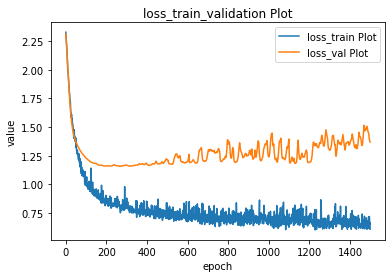

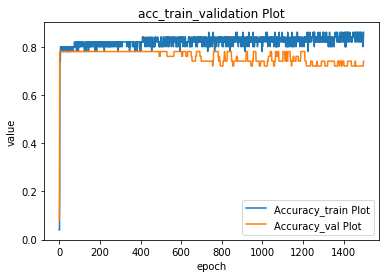

Optimization Finished!
Total time elapsed: 6.7146s
GCN(
  (gc1): GraphConvolution()
  (gc2): GraphConvolution()
)


In [269]:
#train

from __future__ import division
from __future__ import print_function
from torchsummary import summary

import time
import argparse
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim


# Training settings

parser = argparse.ArgumentParser()
parser.add_argument('--no-cuda', action='store_true', default=False,
                    help='Disables CUDA training.')
parser.add_argument('--fastmode', action='store_true', default=False,
                    help='Validate during training pass.')
parser.add_argument('--seed', type=int, default=42, help='Random seed.')
parser.add_argument('--epochs', type=int, default=1500,
                    help='Number of epochs to train.')
parser.add_argument('--lr', type=float, default=0.01,
                    help='Initial learning rate.')
parser.add_argument('--weight_decay', type=float, default=5e-4,
                    help='Weight decay (L2 loss on parameters).')
parser.add_argument('--hidden', type=int, default=16,
                    help='Number of hidden units.')

parser.add_argument('--dropout', type=float, default=0.5,
                    help='Dropout rate (1 - keep probability).')

#args = parser.parse_args()
#error midad khate bala,khate paein jaigozin shod

args = parser.parse_known_args()[0]

args.cuda = not args.no_cuda and torch.cuda.is_available()

np.random.seed(args.seed)
torch.manual_seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)


# Model and optimizer
model = GCN(nfeat=features.shape[1],
            nhid=args.hidden,
            nclass=class_names.size+1,
            dropout=args.dropout)
optimizer = optim.Adam(model.parameters(),
                       lr=args.lr, weight_decay=args.weight_decay)


# to set cuda as your device if possible
#training on  GPU

if args.cuda:
    model.cuda()
    features = features.cuda()
    #adj = adj.cuda()
    #labels = labels.cuda()
    #idx_train = idx_train.cuda()
    #idx_val = idx_val.cuda()
    #idx_test = idx_test.cuda()
    
    # train:adjust the weights on the neural network
    # validation:used to minimize overfitting
 
def test():
    # Turn on evaluation mode which disables dropout.
    model.eval()
    output = model(features_test
                   ,adj_test)
    loss_test = F.nll_loss(output, labels_test)
    acc_test = accuracy(output, labels_test)
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test.item()))

def train(epoch):
  model.train()
  optimizer.zero_grad()
  output = model(features_train,adj_train)
  loss_train = F.nll_loss(output, labels_train)
  acc_train = accuracy(output,labels_train)
  # Computing the gradients necessary to adjust the weights
  loss_train.backward()
  # Updating the weights of the neural network
  optimizer.step()
  losses.append(loss_train.item())
  acc.append(acc_train.item())

  if not args.fastmode:
    # Evaluate validation set performance separately,
    # deactivates dropout during validation run.
    model.eval()
    output = model(features_val, adj_val)

    loss_val = F.nll_loss(output, labels_val)
    acc_val = accuracy(output, labels_val)
    losses_val.append(loss_val.item())
    acc_valid.append(acc_val.item())

    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(loss_train.item()),
          'acc_train: {:.4f}'.format(acc_train.item()),
          'loss_val: {:.4f}'.format(loss_val.item()),
          'acc_val: {:.4f}'.format(acc_val.item()),
          'time: {:.4f}s'.format(time.time() - t))

# Train model
t_total = time.time()
losses = []
acc=[]
losses_val = []
acc_valid=[]
t = time.time()
for epoch in range(args.epochs):
    train(epoch)

# Testing
test()

#plotting loss_train_val:

plt.plot(np.array(losses),label ='loss_train Plot')
plt.plot(np.array(losses_val),label ='loss_val Plot')
plt.title('loss_train_validation Plot')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

#plotting acc_train_val:

plt.plot(np.array(acc),label ='Accuracy_train Plot')
plt.plot(np.array(acc_valid),label ='Accuracy_val Plot')
plt.title('acc_train_validation Plot')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()    

print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

print(model)

In [270]:
len(features[0])

767